* [Business Variables List](https://api.census.gov/data/2019/abscb/variables.html) <br/><br/>
* [Characteristics of Businesses Documentation (SCROLL DOWN FOR DESCRIPTION TAGS)](https://www2.census.gov/programs-surveys/abs/technical-documentation/api/ABS_API_CB-1-26-2021.pdf)

In [228]:
# CHARACTERISTICS OF BUSINESSES

import pandas as pd
import matplotlib as plt
# MAKE SURE THERE ARE NO WHITE SPACES IN ANY VARIABLE STRINGS
labels = 'NAME,FIRMPDEMP,QDESC,BUSCHAR,BUSCHAR_LABEL,YEAR'

data_group = '&for=us'  # FOR ENTIRE USA
#data_group = '&for=state' # FOR STATES


description =f'&{data_group}*&QDESC_LABEL=FAMOWN'
API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscb?get={labels}{data_group}{description}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
df = df.loc[(df['BUSCHAR_LABEL']!='Not applicable') & (df['BUSCHAR_LABEL']!='Item not reported') & (df['BUSCHAR_LABEL']!='Total reporting') & (df['BUSCHAR_LABEL']!='All firms')]
df['FIRMPDEMP'] = df['FIRMPDEMP'].apply(lambda x:float(x/1_000_000))
df = df.rename(columns={'FIRMPDEMP':'Number of Firms', 'BUSCHAR_LABEL':'Business Characteristic'})
df

,NAME,Number of Firms,QDESC,BUSCHAR,Business Characteristic,YEAR,QDESC_LABEL,us
2,United States,0.787775,B02,BM,Family-owned,2018,FAMOWN,1
3,United States,1.893857,B02,BN,Not family-owned,2018,FAMOWN,1


,Business Characteristic,Number of Firms
2,Family-owned,0.787775
3,Not family-owned,1.893857


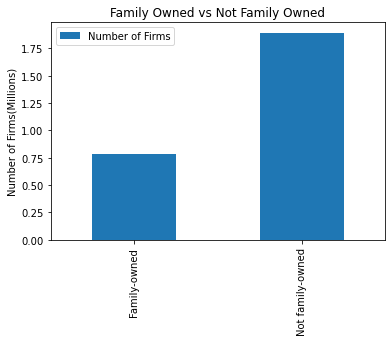

In [229]:
famown = df[['Business Characteristic', 'Number of Firms']]
ax= famown.plot.bar(x= 'Business Characteristic', y= 'Number of Firms', title = 'Family Owned vs Not Family Owned')
ax.set_xlabel('')
ax.set_ylabel('Number of Firms(Millions)')
#ax.set_xticklabels(rotation=45)
famown

In [230]:
# CHARACTERISTICS OF BUSINESSES

import pandas as pd
import matplotlib as plt
import seaborn as sns
# MAKE SURE THERE ARE NO WHITE SPACES IN ANY VARIABLE STRINGS
labels = 'NAME,EMP,FIRMPDEMP,QDESC,BUSCHAR,BUSCHAR_LABEL,YEAR'

data_group = '&for=us'  # FOR ENTIRE USA
#data_group = '&for=state' # FOR STATES


description =f'&{data_group}*&QDESC_LABEL=CEASEOPS'
API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscb?get={labels}{data_group}{description}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)
df = df.loc[(df['BUSCHAR_LABEL']!='All firms') & (df['BUSCHAR_LABEL']!='Total reporting')]
df['FIRMPDEMP'] = df['FIRMPDEMP'].apply(lambda x:float(x/1_000_000))
df = df.rename(columns={'FIRMPDEMP':'Number of Firms', 'BUSCHAR_LABEL':'Business Characteristic'})
df

,NAME,EMP,Number of Firms,QDESC,BUSCHAR,Business Characteristic,YEAR,QDESC_LABEL,us
2,United States,60689506,2.715063,B27,LI,Business is currently operating,2018,CEASEOPS,1
3,United States,1125908,0.133033,B27,LI00,Business operations have ceased,2018,CEASEOPS,1
5,United States,531118,0.035451,B27,LT,Operating status not reported,2018,CEASEOPS,1


Text(0, 0.5, '')

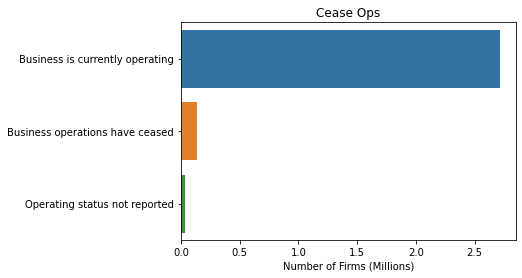

In [231]:
ceaseops = df[['Number of Firms', 'Business Characteristic']]
ax = sns.barplot(x='Number of Firms', y= 'Business Characteristic', data= ceaseops, orient='h')
#ax.set_ylabel('')
ax.set_xlabel('Number of Firms (Millions)')
ax.set_title("Cease Ops")
ax.set_ylabel('')

In [232]:
# CHARACTERISTICS OF BUSINESSES

import pandas as pd
import matplotlib as plt
# MAKE SURE THERE ARE NO WHITE SPACES IN ANY VARIABLE STRINGS
labels = 'NAME,EMP,FIRMPDEMP,QDESC,BUSCHAR,BUSCHAR_LABEL,YEAR'

data_group = '&for=us'  # FOR ENTIRE USA
#data_group = '&for=state' # FOR STATES


description =f'&{data_group}*&QDESC_LABEL=WORKERS'
API_key = '&key=1ba63b3df04e1bd07755febe18f836df1b86fc9f'

df = pd.read_json(f'https://api.census.gov/data/2018/abscb?get={labels}{data_group}{description}{API_key}')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data after the header row
df.columns = new_header #set the header row as the df header
df['EMP'] = df['EMP'].astype(int)
df = df.loc[(df['BUSCHAR_LABEL']!='None of the above') & (df['BUSCHAR_LABEL']!='Item not reported') & (df['BUSCHAR_LABEL']!='Total reporting') & (df['BUSCHAR_LABEL']!='All firms')]
df['EMP'] = df['EMP'].apply(lambda x:float(x/1_000_000))
df = df.rename(columns={'EMP':'Number of Employees', 'BUSCHAR_LABEL':'Type of Worker'})
df = df.sort_values(by='Number of Employees', ascending=True)
df

,NAME,Number of Employees,FIRMPDEMP,QDESC,BUSCHAR,Type of Worker,YEAR,QDESC_LABEL,us
4,United States,2.743846,48863,B20,JV,Paid day laborers,2018,WORKERS,1
6,United States,7.798991,18824,B20,JX,Leased employees from leasing service or profe...,2018,WORKERS,1
5,United States,24.154033,94928,B20,JW,Temporary staffing obtained from a temporary h...,2018,WORKERS,1
7,United States,32.230151,815750,B20,JY,"Contractors, subcontractors, independent contr...",2018,WORKERS,1
3,United States,42.869043,1222217,B20,JU,Part-time paid employees,2018,WORKERS,1
2,United States,48.132727,1835114,B20,JT,Full-time paid employees,2018,WORKERS,1


Text(0.5, 0, 'Number of Employees(Millions)')

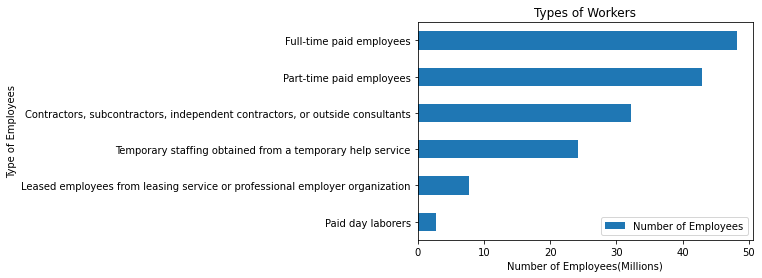

In [233]:
workers = df[['Number of Employees', 'Type of Worker']]
ax= workers.plot.barh(x= 'Type of Worker', y= 'Number of Employees', title = 'Types of Workers')
ax.set_ylabel('Type of Employees')
ax.set_xlabel('Number of Employees(Millions)')